# Neural Networks Model using Keras and TensorFlow

## Objectives:
-Create a neural network model with Keras

-Evaluate models using cross-validation with scikit-learn 

-Tune model with Keras

In [3]:
import numpy 
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Using TensorFlow backend.


## Dataset Visualization:

In [6]:


# load dataset 
df = pd.read_csv("DataNVMpy.csv") 
dataset = df.values



#split data into X and Y variables:
X = dataset[:,1:13]
Y = dataset[:,0]

scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)
scaler2 = MinMaxScaler(feature_range=(-1,1))
Xscaled2 = scaler.fit_transform(X)

print(Xscaled)
print(Xscaled2)
print(Y)

#standardize the dataset


# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(
    Xscaled, Y, test_size=0.20, random_state=42)

#plot regression chart
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    

[[ 9.67922489 -0.06711952  8.33966015 ...  0.34551699  0.62144536
  -0.14421789]
 [ 9.67922489 -0.06711952  8.33966015 ...  0.34551699  0.62144536
  -0.14421789]
 [ 9.67922489 -0.06711952  1.1102758  ...  0.34551699  0.62144536
  -0.14421789]
 ...
 [-1.60956568 -0.06711952 -1.78147795 ...  0.34551699  0.62144536
  -0.14421789]
 [-1.60956568 -0.06711952 -1.78147795 ...  0.34551699  0.62144536
  -0.14421789]
 [-1.60956568 -0.06711952 -1.78147795 ...  0.34551699  0.62144536
  -0.14421789]]
[[ 9.67922489 -0.06711952  8.33966015 ...  0.34551699  0.62144536
  -0.14421789]
 [ 9.67922489 -0.06711952  8.33966015 ...  0.34551699  0.62144536
  -0.14421789]
 [ 9.67922489 -0.06711952  1.1102758  ...  0.34551699  0.62144536
  -0.14421789]
 ...
 [-1.60956568 -0.06711952 -1.78147795 ...  0.34551699  0.62144536
  -0.14421789]
 [-1.60956568 -0.06711952 -1.78147795 ...  0.34551699  0.62144536
  -0.14421789]
 [-1.60956568 -0.06711952 -1.78147795 ...  0.34551699  0.62144536
  -0.14421789]]
[1305000 1250000

c:\programdata\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\programdata\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\programdata\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\programdata\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
df.head() #verifying that we could read the data correctly

,price,size,canalhouse,rooms,balconyroofterrace,parking,carport,garage,garden,maintenancegood,centralheating,insulation,listed
0,1305000,500,0,15,0,1,0,1,0,0,1,1,0
1,1250000,500,0,15,0,1,0,1,0,0,1,1,0
2,1225000,500,0,5,0,1,0,1,0,1,1,1,0
3,3150000,475,0,10,0,1,0,1,0,1,1,1,0
4,2050000,475,0,5,1,1,1,0,1,1,1,0,0


## Baseline Neural Network Model 

In [13]:

# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(1, activation= 'linear'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Baseline: -16891503100.47 (4142133497.96) MSE


[[ 3.03807013 -0.4843221   1.57314861 ...  0.5         1.19959343
  -0.42008403]
 [ 3.03807013 -0.4843221   1.57314861 ...  0.5         1.19959343
  -0.42008403]
 [ 3.03807013 -0.4843221  -1.69064518 ...  0.5         1.19959343
  -0.42008403]
 ...
 [-1.0029915  -0.4843221  -0.38512767 ... -2.         -0.83361577
  -0.42008403]
 [-1.0029915   2.0647416  -0.38512767 ...  0.5        -0.83361577
   2.38047614]
 [-1.0029915  -0.4843221  -0.71150705 ...  0.5        -0.83361577
  -0.42008403]]


Epoch 00015: early stopping
Score (RMSE): 129506.4881909406


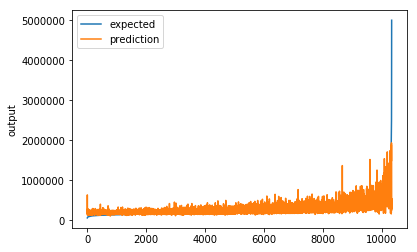

In [14]:
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=0,epochs=500)
model.load_weights('best_weights.hdf5') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)
score = numpy.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),y_test)

In [39]:
numpy.sqrt(100)

10.0

# Log Price

In [9]:
lnY = numpy.log(Y)

# Split into train/test version 2, with Log_Price
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    Xscaled, lnY, test_size=0.20, random_state=42)

Epoch 00011: early stopping
Score (RMSE): 0.30515317560273925


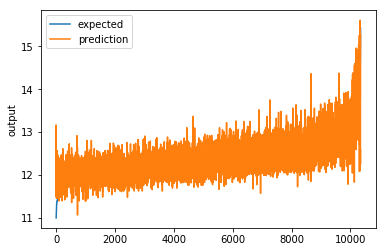

In [22]:
model = Sequential()
model.add(Dense(100, input_dim=12, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
model.fit(x_train2,y_train2,validation_data=(x_test2,y_test2),callbacks=[monitor,checkpointer],verbose=0,epochs=1000)
model.load_weights('best_weights.hdf5') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test2)
score = numpy.sqrt(metrics.mean_squared_error(pred,y_test2))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),y_test2)

Score (RMSE): 0.3052835280240057


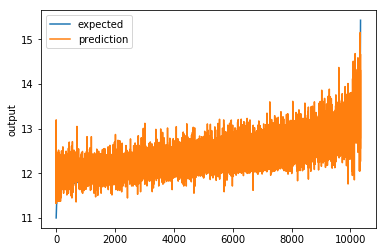

In [21]:
# Predict and measure RMSE
pred = model.predict(x_test2)
score = numpy.sqrt(metrics.mean_squared_error(pred,y_test2))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),y_test2)

In [10]:
# Split into train/test version 2, with Log_Price
x_train3, x_test3, y_train3, y_test3 = train_test_split(
    Xscaled2, lnY, test_size=0.20, random_state=42)

Epoch 00022: early stopping
Score (RMSE): 0.29745985737781144


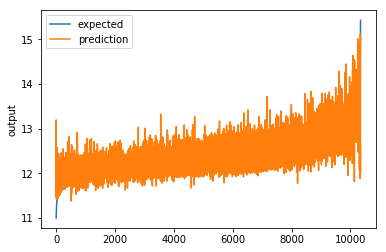

In [11]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model
model.fit(x_train3,y_train3,validation_data=(x_test3,y_test3),callbacks=[monitor,checkpointer],verbose=0,epochs=1000)
model.load_weights('best_weights.hdf5') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test3)
score = numpy.sqrt(metrics.mean_squared_error(pred,y_test3))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),y_test3)


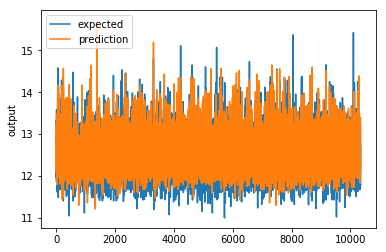

In [30]:

chart_regression(pred.flatten(),y_test3,sort=False)

Score (RMSE): 0.29841140649377407


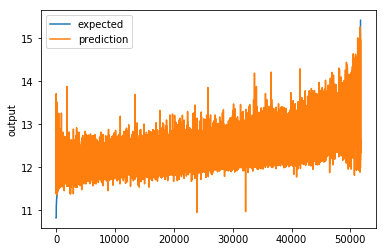

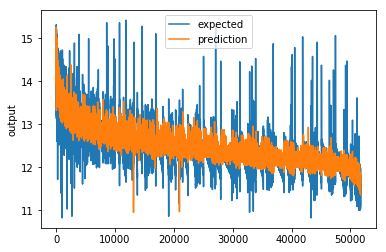

In [19]:
# Predict and measure RMSE
pred = model.predict(Xscaled2)
score = numpy.sqrt(metrics.mean_squared_error(pred,lnY))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),lnY)
chart_regression(pred.flatten(),lnY,sort=False)